In [1]:
# Question 1 #
from complex_iterates import complex_iterate
import numpy as np
import matplotlib as mpl
import cmath

In [2]:
num = 100

x = np.linspace(-2, 2, num)
y = np.linspace(-2, 2, num)

z = np.empty((num, num))

for xindex, xval in np.ndenumerate(x): 
    for yindex, yval in np.ndenumerate(y): 
        z[xindex, yindex] = complex_iterate(xval, yval)

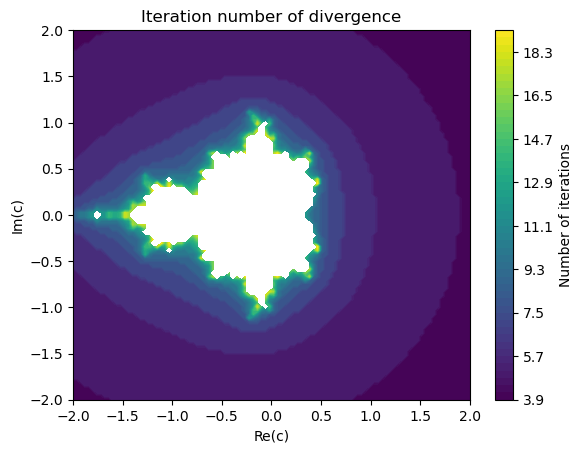

In [3]:
import matplotlib.pyplot as plt

X,Y = np.meshgrid(x,y,indexing='ij')
plt.figure(dpi=100)
plt.contourf(X, Y, z, levels=50)
plt.title('Iteration number of divergence')
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.colorbar(label="Number of iterations")
plt.show()

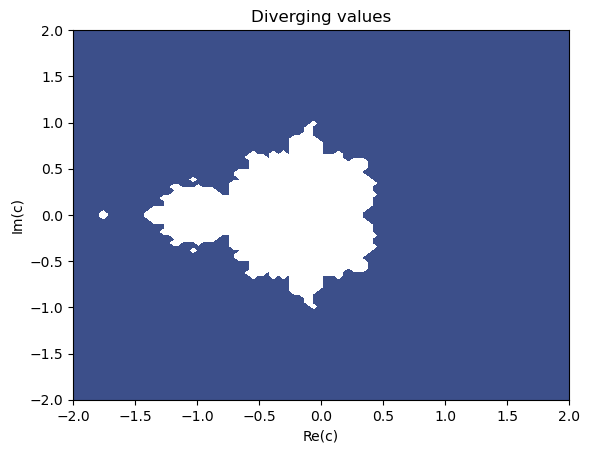

In [4]:
X,Y = np.meshgrid(x,y,indexing='ij')
z[z > 0] = 10 # Replacing iteration number associated with diverging values of c with fixed number  

plt.figure(dpi=100)
plt.contourf(X, Y, z, levels=50)
plt.title('Diverging values')
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.show()

In [5]:
## Question 2 ##

from scipy.integrate import solve_ivp

def FW(t, w, sigma, r, b):
    """Right hand side of Lorenz' equations
    
    Parameters: 
    t --- Independent variable (time)
    w --- Solution to coupled ODE (1 x 3 array)
    sigma --- Prandtl number
    r --- Rayleigh number
    b --- Dimensionless length scale 
    
    Returns: 
    Array with RHS of \dot{W} 
    """
    x, y, z = w
    return[-sigma * (x - y), (r * x) - y - (x * z), (-b * z) + (x * y)]

W0 = [0, 1, 0]

sol = solve_ivp(FW, [0, 60], W0, args=(10, 28, 8/3),
                dense_output=True)

In [ ]:
plt.figure(dpi=100)
plt.plot(sol.t, sol.y[1,:])
plt.title('Reproduction of Lorenz Figure 1')
plt.xlabel("Time")
plt.ylabel("Y component of solution W")
plt.show()

In [ ]:
t = np.linspace(14, 19, 1000) # limit time interval, increase iterations
W = sol.sol(t)

In [ ]:
plt.figure(dpi=100)
plt.plot(W[1], W[2])
plt.title('Reproduction of Lorenz Figure 2 A')
plt.xlabel("Y component of W")
plt.ylabel("Z component of W")
plt.show()

In [ ]:
plt.figure(dpi=100)
plt.plot(W[1], W[0])
plt.title('Reproduction of Lorenz Figure 2 B')
plt.xlabel("Y component of W")
plt.ylabel("X component of W")
plt.show()

In [ ]:
# Altering initial parameters

W0_prime = [sum(x) for x in zip(W0, [0, 1e-8, 0])]

sol2 = solve_ivp(FW, [0, 60], W0_prime, args=(10, 28, 8/3),
                dense_output=True)

In [ ]:
diff_W = sol.y - sol2.y

norm_diff_W = [np.linalg.norm([diff_W[0][i], diff_W[1][i], diff_W[2][i]]) for i in range(len(sol.y[0]))]

In [ ]:
plt.semilogy(sol.t, norm_diff_W)
plt.title('Distance between W and W prime')
plt.xlabel("Time")
plt.ylabel("Distance")
plt.show()